# Coursework 1  - Exercise 3

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, learning_rule.learning_rate

In [2]:
def plot_stats(stat, title=None, save=False, filename=None):
    stats, keys, run_time, _, _, _, _, _ = stat
    fig, axs = plt.subplots(2,1, figsize=(6,8))
    
    if title is not None:
#         learn_rate = title.split(",")[0]
        plt.suptitle(title)

    for k in ['error(train)', 'error(valid)']:
        axs[0].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[0].legend(loc=0)
    axs[0].set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    for k in ['acc(train)', 'acc(valid)']:
        axs[1].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[1].legend(loc=0)
    axs[1].set_xlabel('Epoch number')
    
    if(save):
        plt.savefig(filename + ".pdf")

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider
from mlp.schedulers import ConstantLearningRateScheduler, CosineAnnealingWithWarmRestarts, CosineAnnealingWithWarmRestartsPlus
from mlp.initialisers import ConstantInit, GlorotUniformInit

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# define possilb schedulers
schedulers_sgd = [ConstantLearningRateScheduler(0.005),
              CosineAnnealingWithWarmRestarts(min_learning_rate=0.0005, max_learning_rate=0.005,
                                                       total_iters_per_period=10e+30,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0),
              CosineAnnealingWithWarmRestarts(min_learning_rate=0.0005, max_learning_rate=0.005,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0),
              CosineAnnealingWithWarmRestartsPlus(min_learning_rate=0.0005, max_learning_rate=0.005,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)
             ]

schedulers_adam = [ConstantLearningRateScheduler(0.0001),
              CosineAnnealingWithWarmRestarts(min_learning_rate=0.00001, max_learning_rate=0.0001,
                                                       total_iters_per_period=10e+30,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0),
              CosineAnnealingWithWarmRestarts(min_learning_rate=0.00001, max_learning_rate=0.0001,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0),
              CosineAnnealingWithWarmRestartsPlus(min_learning_rate=0.0005, max_learning_rate=0.005,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)
             ]

KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff5d42bc160>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff5ada20588>)


Epoch 5: 2.4s to complete
    error(train)=1.37e+00, acc(train)=6.15e-01, error(valid)=1.37e+00, acc(valid)=6.14e-01


Epoch 10: 1.8s to complete
    error(train)=9.78e-01, acc(train)=7.13e-01, error(valid)=9.86e-01, acc(valid)=7.11e-01


Epoch 15: 1.8s to complete
    error(train)=8.11e-01, acc(train)=7.56e-01, error(valid)=8.25e-01, acc(valid)=7.50e-01


Epoch 20: 2.6s to complete
    error(train)=7.22e-01, acc(train)=7.79e-01, error(valid)=7.45e-01, acc(valid)=7.71e-01


Epoch 25: 1.8s to complete
    error(train)=6.54e-01, acc(train)=7.97e-01, error(valid)=6.81e-01, acc(valid)=7.88e-01


Epoch 30: 2.2s to complete
    error(train)=6.14e-01, acc(train)=8.06e-01, error(valid)=6.46e-01, acc(valid)=7.96e-01


Epoch 35: 1.3s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


Epoch 40: 1.3s to complete
    error(train)=5.43e-01, acc(train)=8.25e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


Epoch 45: 1.3s to complete
    error(train)=5.25e-01, acc(train)=8.30e-01, error(valid)=5.77e-01, acc(valid)=8.13e-01


Epoch 50: 1.3s to complete
    error(train)=4.97e-01, acc(train)=8.38e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 55: 1.3s to complete
    error(train)=4.84e-01, acc(train)=8.41e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


Epoch 60: 1.3s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


Epoch 65: 1.3s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.25e-01


Epoch 70: 1.3s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 75: 1.4s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


Epoch 80: 1.3s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 85: 1.3s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 90: 1.3s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 95: 1.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 100: 1.4s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 5: 1.3s to complete
    error(train)=1.35e+00, acc(train)=6.18e-01, error(valid)=1.35e+00, acc(valid)=6.12e-01


Epoch 10: 1.3s to complete
    error(train)=9.70e-01, acc(train)=7.16e-01, error(valid)=9.82e-01, acc(valid)=7.09e-01


Epoch 15: 1.3s to complete
    error(train)=8.04e-01, acc(train)=7.58e-01, error(valid)=8.24e-01, acc(valid)=7.48e-01


Epoch 20: 1.4s to complete
    error(train)=7.25e-01, acc(train)=7.77e-01, error(valid)=7.54e-01, acc(valid)=7.67e-01


Epoch 25: 1.5s to complete
    error(train)=6.50e-01, acc(train)=7.99e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


Epoch 30: 1.4s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 35: 1.4s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.07e-01


Epoch 40: 1.3s to complete
    error(train)=5.39e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


Epoch 45: 1.5s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.76e-01, acc(valid)=8.20e-01


Epoch 50: 1.4s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 55: 1.6s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 60: 1.3s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 65: 1.5s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 70: 1.4s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 75: 1.4s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 80: 1.3s to complete
    error(train)=4.14e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 85: 1.3s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 90: 1.4s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 95: 1.4s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 100: 1.4s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 5: 1.3s to complete
    error(train)=2.09e+00, acc(train)=4.52e-01, error(valid)=2.09e+00, acc(valid)=4.47e-01


Epoch 10: 1.3s to complete
    error(train)=1.54e+00, acc(train)=5.70e-01, error(valid)=1.55e+00, acc(valid)=5.69e-01


Epoch 15: 1.3s to complete
    error(train)=1.23e+00, acc(train)=6.49e-01, error(valid)=1.24e+00, acc(valid)=6.45e-01


Epoch 20: 1.4s to complete
    error(train)=1.09e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


Epoch 25: 1.4s to complete
    error(train)=1.03e+00, acc(train)=6.99e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


Epoch 30: 1.3s to complete
    error(train)=9.64e-01, acc(train)=7.16e-01, error(valid)=9.77e-01, acc(valid)=7.13e-01


Epoch 35: 1.3s to complete
    error(train)=8.69e-01, acc(train)=7.42e-01, error(valid)=8.85e-01, acc(valid)=7.35e-01


Epoch 40: 1.3s to complete
    error(train)=8.06e-01, acc(train)=7.58e-01, error(valid)=8.23e-01, acc(valid)=7.51e-01


Epoch 45: 1.3s to complete
    error(train)=7.58e-01, acc(train)=7.71e-01, error(valid)=7.79e-01, acc(valid)=7.65e-01


Epoch 50: 1.3s to complete
    error(train)=7.23e-01, acc(train)=7.81e-01, error(valid)=7.44e-01, acc(valid)=7.72e-01


Epoch 55: 1.3s to complete
    error(train)=6.96e-01, acc(train)=7.87e-01, error(valid)=7.19e-01, acc(valid)=7.76e-01


Epoch 60: 1.3s to complete
    error(train)=6.78e-01, acc(train)=7.92e-01, error(valid)=7.01e-01, acc(valid)=7.84e-01


Epoch 65: 1.3s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=6.89e-01, acc(valid)=7.86e-01


Epoch 70: 1.3s to complete
    error(train)=6.54e-01, acc(train)=7.97e-01, error(valid)=6.80e-01, acc(valid)=7.89e-01


Epoch 75: 1.3s to complete
    error(train)=6.45e-01, acc(train)=8.00e-01, error(valid)=6.72e-01, acc(valid)=7.91e-01


Epoch 80: 1.4s to complete
    error(train)=6.39e-01, acc(train)=8.02e-01, error(valid)=6.66e-01, acc(valid)=7.92e-01


Epoch 85: 1.3s to complete
    error(train)=6.30e-01, acc(train)=8.04e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


Epoch 90: 1.3s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.40e-01, acc(valid)=7.99e-01


Epoch 95: 1.6s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=6.29e-01, acc(valid)=8.02e-01


Epoch 100: 1.6s to complete
    error(train)=5.76e-01, acc(train)=8.17e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01


Epoch 5: 1.6s to complete
    error(train)=2.35e+00, acc(train)=3.80e-01, error(valid)=2.36e+00, acc(valid)=3.69e-01


Epoch 10: 1.6s to complete
    error(train)=1.55e+00, acc(train)=5.70e-01, error(valid)=1.57e+00, acc(valid)=5.63e-01


Epoch 15: 1.6s to complete
    error(train)=1.22e+00, acc(train)=6.51e-01, error(valid)=1.23e+00, acc(valid)=6.46e-01


Epoch 20: 1.7s to complete
    error(train)=1.10e+00, acc(train)=6.84e-01, error(valid)=1.11e+00, acc(valid)=6.78e-01


Epoch 25: 1.6s to complete
    error(train)=1.05e+00, acc(train)=6.96e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


Epoch 30: 1.6s to complete
    error(train)=9.77e-01, acc(train)=7.17e-01, error(valid)=9.87e-01, acc(valid)=7.11e-01


Epoch 35: 1.6s to complete
    error(train)=8.90e-01, acc(train)=7.40e-01, error(valid)=9.03e-01, acc(valid)=7.30e-01


Epoch 40: 1.6s to complete
    error(train)=8.27e-01, acc(train)=7.54e-01, error(valid)=8.42e-01, acc(valid)=7.49e-01


Epoch 45: 1.6s to complete
    error(train)=7.77e-01, acc(train)=7.66e-01, error(valid)=7.95e-01, acc(valid)=7.59e-01


Epoch 50: 1.6s to complete
    error(train)=7.38e-01, acc(train)=7.77e-01, error(valid)=7.56e-01, acc(valid)=7.71e-01


Epoch 55: 1.5s to complete
    error(train)=7.12e-01, acc(train)=7.83e-01, error(valid)=7.31e-01, acc(valid)=7.78e-01


Epoch 60: 1.7s to complete
    error(train)=6.92e-01, acc(train)=7.90e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 65: 1.6s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=7.00e-01, acc(valid)=7.86e-01


Epoch 70: 1.6s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.89e-01, acc(valid)=7.88e-01


Epoch 75: 1.7s to complete
    error(train)=6.58e-01, acc(train)=7.98e-01, error(valid)=6.80e-01, acc(valid)=7.92e-01


Epoch 80: 1.6s to complete
    error(train)=6.52e-01, acc(train)=7.99e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


Epoch 85: 1.5s to complete
    error(train)=6.53e-01, acc(train)=7.96e-01, error(valid)=6.78e-01, acc(valid)=7.90e-01


Epoch 90: 1.6s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 95: 1.5s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=6.31e-01, acc(valid)=8.03e-01


Epoch 100: 1.5s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01


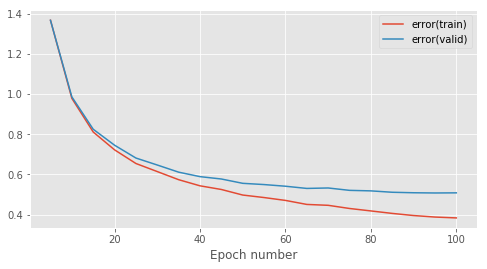

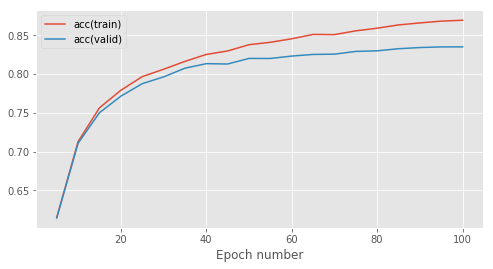

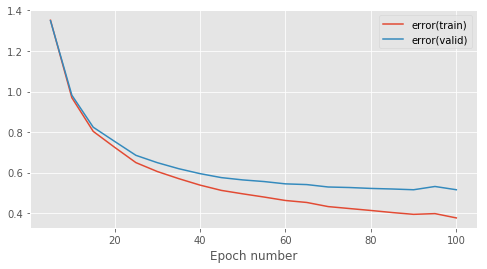

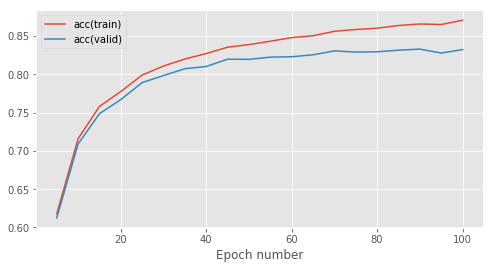

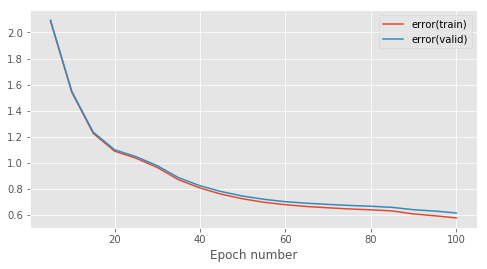

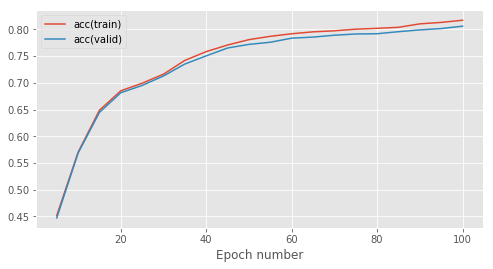

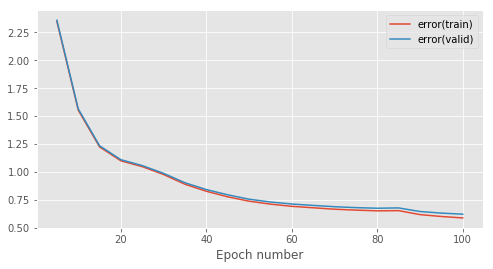

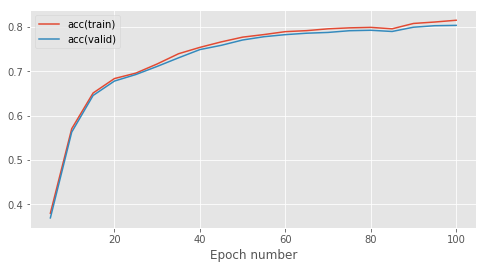

In [23]:
# Simple model with SGD and 3 hidden layers. To be used as baseline

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.learning_rules import GradientDescentLearningRule, AdamLearningRule
from mlp.schedulers import ConstantLearningRateScheduler, CosineAnnealingWithWarmRestarts
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.005
batch = 100
num_epochs = 100
stats_interval = 5
input_dim, output_dim, hidden_dim = 784, 47, 100

res_sgd = []

train_data.reset()
valid_data.reset()

for scheduler in schedulers_sgd:


    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)
    
    res_sgd.append(res)

Epoch 5: 2.9s to complete
    error(train)=8.43e-01, acc(train)=7.50e-01, error(valid)=8.62e-01, acc(valid)=7.45e-01


Epoch 10: 3.1s to complete
    error(train)=6.63e-01, acc(train)=7.94e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


Epoch 15: 3.1s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


Epoch 20: 3.2s to complete
    error(train)=5.29e-01, acc(train)=8.30e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 25: 3.2s to complete
    error(train)=4.87e-01, acc(train)=8.41e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 30: 3.1s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 35: 3.4s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 40: 3.2s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 45: 3.2s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 50: 3.2s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 55: 3.1s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 60: 3.1s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 65: 3.1s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 70: 3.0s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 75: 3.1s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 80: 3.1s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


Epoch 85: 3.0s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 90: 3.1s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 95: 3.0s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 100: 3.0s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


Epoch 5: 2.8s to complete
    error(train)=8.33e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.48e-01


Epoch 10: 3.2s to complete
    error(train)=6.61e-01, acc(train)=7.97e-01, error(valid)=6.95e-01, acc(valid)=7.87e-01


Epoch 15: 3.1s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=7.95e-01


Epoch 20: 3.1s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 25: 3.1s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 30: 3.0s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 35: 3.0s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


Epoch 40: 3.1s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 45: 3.1s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 50: 3.0s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 55: 3.0s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 60: 3.1s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 65: 3.1s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 70: 3.0s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 75: 3.1s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 80: 3.0s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.29e-01, acc(valid)=8.35e-01


Epoch 85: 3.0s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


Epoch 90: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=5.36e-01, acc(valid)=8.32e-01


Epoch 95: 3.0s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01


Epoch 100: 3.0s to complete
    error(train)=2.81e-01, acc(train)=9.01e-01, error(valid)=5.47e-01, acc(valid)=8.33e-01


Epoch 5: 2.9s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.08e+00, acc(valid)=6.86e-01


Epoch 10: 3.1s to complete
    error(train)=9.09e-01, acc(train)=7.34e-01, error(valid)=9.24e-01, acc(valid)=7.28e-01


Epoch 15: 3.0s to complete
    error(train)=7.61e-01, acc(train)=7.71e-01, error(valid)=7.87e-01, acc(valid)=7.61e-01


Epoch 20: 3.3s to complete
    error(train)=6.98e-01, acc(train)=7.88e-01, error(valid)=7.29e-01, acc(valid)=7.78e-01


Epoch 25: 3.0s to complete
    error(train)=6.72e-01, acc(train)=7.96e-01, error(valid)=7.06e-01, acc(valid)=7.87e-01


Epoch 30: 3.1s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.84e-01, acc(valid)=7.90e-01


Epoch 35: 3.0s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=7.99e-01


Epoch 40: 3.2s to complete
    error(train)=5.72e-01, acc(train)=8.22e-01, error(valid)=6.27e-01, acc(valid)=8.06e-01


Epoch 45: 3.2s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 50: 3.1s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 55: 3.1s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 60: 3.5s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


Epoch 65: 3.1s to complete
    error(train)=4.95e-01, acc(train)=8.41e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


Epoch 70: 3.6s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


Epoch 75: 3.1s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 80: 3.2s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 85: 3.1s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 90: 3.4s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 95: 5.5s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 100: 5.3s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 5: 4.3s to complete
    error(train)=4.95e-01, acc(train)=8.29e-01, error(valid)=6.04e-01, acc(valid)=8.05e-01


Epoch 10: 4.6s to complete
    error(train)=4.40e-01, acc(train)=8.41e-01, error(valid)=6.07e-01, acc(valid)=8.04e-01


Epoch 15: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.68e-01, error(valid)=5.66e-01, acc(valid)=8.26e-01


Epoch 20: 4.6s to complete
    error(train)=2.59e-01, acc(train)=8.99e-01, error(valid)=5.85e-01, acc(valid)=8.33e-01


Epoch 25: 4.9s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.61e-01, acc(valid)=8.39e-01


Epoch 30: 4.1s to complete
    error(train)=3.29e-01, acc(train)=8.77e-01, error(valid)=6.46e-01, acc(valid)=8.19e-01


Epoch 35: 4.6s to complete
    error(train)=3.36e-01, acc(train)=8.75e-01, error(valid)=6.76e-01, acc(valid)=8.17e-01


Epoch 40: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.80e-01, error(valid)=6.86e-01, acc(valid)=8.16e-01


Epoch 45: 4.2s to complete
    error(train)=2.79e-01, acc(train)=8.92e-01, error(valid)=7.47e-01, acc(valid)=8.23e-01


Epoch 50: 4.2s to complete
    error(train)=2.63e-01, acc(train)=8.99e-01, error(valid)=7.88e-01, acc(valid)=8.20e-01


Epoch 55: 4.3s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=8.51e-01, acc(valid)=8.22e-01


Epoch 60: 4.7s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=9.61e-01, acc(valid)=8.24e-01


Epoch 65: 4.7s to complete
    error(train)=1.56e-01, acc(train)=9.34e-01, error(valid)=1.07e+00, acc(valid)=8.24e-01


Epoch 70: 4.3s to complete
    error(train)=1.36e-01, acc(train)=9.42e-01, error(valid)=1.18e+00, acc(valid)=8.24e-01


Epoch 75: 4.7s to complete
    error(train)=1.10e-01, acc(train)=9.53e-01, error(valid)=1.35e+00, acc(valid)=8.24e-01


Epoch 80: 4.8s to complete
    error(train)=1.02e-01, acc(train)=9.57e-01, error(valid)=1.52e+00, acc(valid)=8.22e-01


Epoch 85: 4.4s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=1.06e+00, acc(valid)=8.13e-01


Epoch 90: 4.4s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=9.19e-01, acc(valid)=8.17e-01


Epoch 95: 5.1s to complete
    error(train)=2.87e-01, acc(train)=8.93e-01, error(valid)=9.10e-01, acc(valid)=8.13e-01


Epoch 100: 4.2s to complete
    error(train)=2.59e-01, acc(train)=9.01e-01, error(valid)=9.09e-01, acc(valid)=8.14e-01


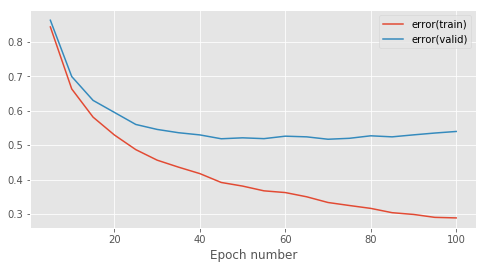

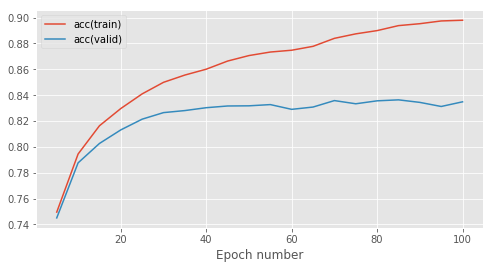

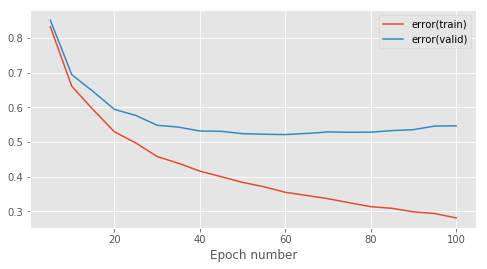

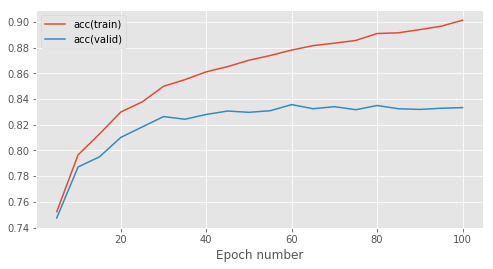

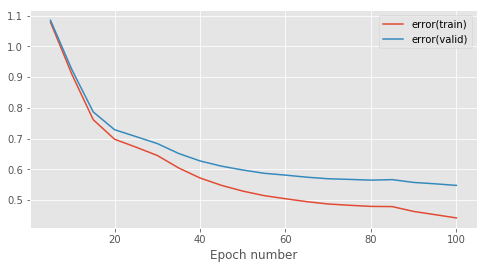

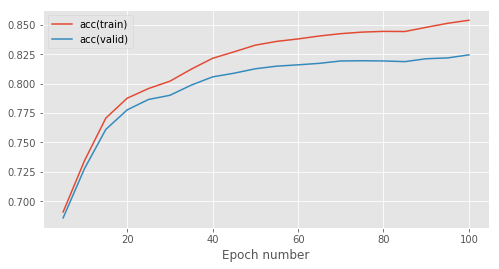

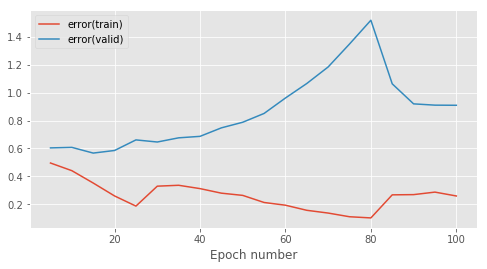

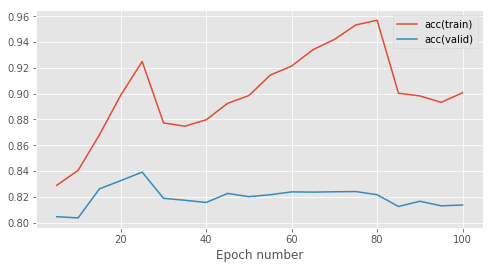

In [4]:
# Simple model with SGD and 3 hidden layers. To be used as baseline

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0001
batch = 100
num_epochs = 100
stats_interval = 5# learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
input_dim, output_dim, hidden_dim = 784, 47, 100

res_adam = []
train_data.reset()
valid_data.reset()

for scheduler in schedulers_adam:

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
    
    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)
    
    res_adam.append(res)

8
Learing rate: 0.005
Training time is 112.56273221969604
Error in train 0.4969554553435604
Error in valid 0.5552901930118401
8
Learing rate: 0.005000000000000001
Training time is 92.84757447242737
Error in train 0.5100027804216143
Error in valid 0.5737399008209313
8
Learing rate: 0.0016961432390175083
Training time is 74.788254737854
Error in train 0.753259244370121
Error in valid 0.7764642356852687
8
Learing rate: 0.0016961432390175083
Training time is 73.96288895606995
Error in train 0.7510284907149178
Error in valid 0.771026810947324


IndexError: index 3 is out of bounds for axis 0 with size 3

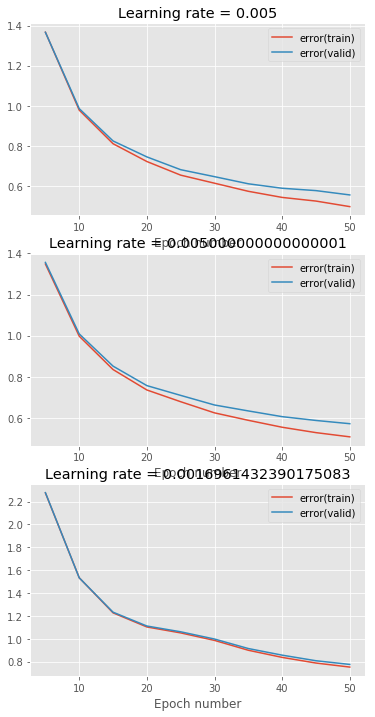

In [15]:
# Go over all experiments and plots stats of each along with their plots

fig, axs = plt.subplots(3,1, figsize=(6, 12))
# plt.suptitle("Adam optimisation with different learning rates")


for idx, stat in enumerate(res_sgd):
#     stat = each
    print(len(stat))
    stats, keys, run_time, _, _, _, _, learn = stat
    error_valid = stats[:,keys['error(valid)']][-1]
    error_train = stats[:,keys['error(train)']][-1]
    print("Learing rate:", learn)
    print("Training time is", stat[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)

    for k in ["error(train)", 'error(valid)']:
        axs[idx].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[idx].legend(loc=0)
    axs[idx].set_xlabel('Epoch number')
    axs[idx].set_title("Learning rate = " + str(learn))
    
plt.subplots_adjust(hspace=0.5)
# plt.savefig("ex2_rms.pdf")
        

In [62]:
top_res = [res_sgd, res_rms[-1][0], res_adam[-1][0]]
top_res_str = ["SGD", "RMSProp", "Adam"]

Training time is 325.61462593078613
Error in train 0.8979699999999952
Error in valid 0.8348734177215185
Training time is 319.67579078674316
Error in train 0.9012199999999958
Error in valid 0.8332911392405059
Training time is 340.71769094467163
Error in train 0.8541100000000018
Error in valid 0.8246202531645566
Training time is 477.07040190696716
Error in train 0.9006899999999961
Error in valid 0.8136708860759491


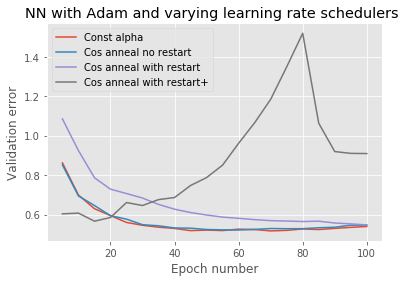

In [5]:
# plot the results from multile experiments onto one plot
# fig_1 = plt.figure(figsize=(6, 4))
# ax_1 = fig_1.add_subplot(111)

fig, axs = plt.subplots(1,1, figsize=(6, 4))
top_res_str = ["Const alpha", "Cos anneal no restart", "Cos anneal with restart", "Cos anneal with restart+"]

for idx, each in enumerate(res_adam):
    stats, keys, run_time, _, _, _, _, _ = each
    error_valid = stats[:,keys['acc(valid)']][-1]
    error_train = stats[:,keys['acc(train)']][-1]
    print("Training time is", each[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)
    axs.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys["error(valid)"]], label=str(top_res_str[idx]))
    axs.legend(loc=0)
    axs.set_xlabel('Epoch number')
    axs.set_ylabel('Validation error')
    axs.set_title('NN with Adam and varying learning rate schedulers ')
                        
    plt.savefig("ex3_adam_comparison.pdf")